# ns-3 test results
This notebook takes results from the ns3 tests and plots them.

CAREFUL! cwnd does not translate to throughput, even for a program sending at the full capacity of the cwnd. 

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import re
plt.rcParams.update(plt.rcParamsDefault)

#### Plotting in latex

In [14]:
#configure before plotting
plt.rcParams.update(plt.rcParamsDefault)
matplotlib.use("pgf")
matplotlib.rcParams.update(
    {
        # Adjust to your LaTex-Engine
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.unicode_minus": False,
    }
)
filename = "reno0.dat"
save_figure = True


# read file and convert to numpy
data = np.loadtxt(f'./ns3_results/{filename}')
# plot data
fig, axs = plt.subplots(1, 1, figsize=(6,4))
axs.plot(data[:,0],data[:,1])
axs.set_xlabel("time")
axs.set_ylabel("cwnd")
axs.grid()
axs.set_title(r"bandwidth=, loss_probability=, etc...")
fig.suptitle("cwnd of reno with")
if save_figure:
    plt.savefig(f"./figures/ns3_results/{filename}.pgf")
plt.tight_layout()

## Plotting different ns3 tests

Theoretical maximum cwnd for 500Kbps = 480packets/s (MSS= 1040*b) bottleneck link with RTT = 600ms (=2*300ms) is  7.211538461538462 packets


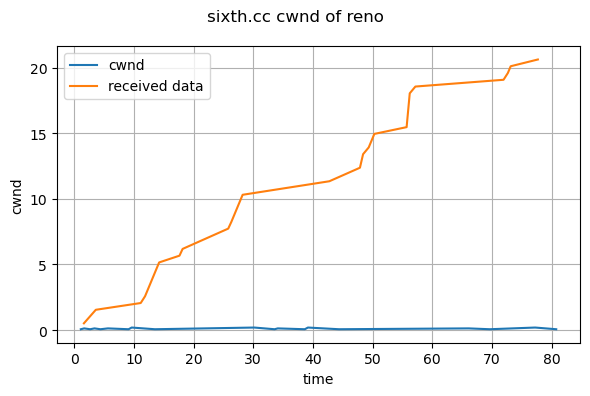

average cwnd = 0.10850202429149797
average sending rate = 1504.561403508772 bps, total data transmitted = 121506.72392982455 bits = 14.604173549257759packets


In [100]:
# read file and convert to numpy
data = np.loadtxt(f'./ns3_results/07.08.23/TcpCubic0.001000-5.000000ms-10Kbps-0.cwnd')
# plot data
rtt = 2*0.01
mtu = 1040*8
print("Theoretical maximum cwnd for 500Kbps = 480packets/s (MSS= 1040*b) bottleneck link with RTT = 600ms (=2*300ms) is ", 1e5*rtt/mtu, "packets")
fig, axs = plt.subplots(1, 1, figsize=(6,4))
axs.plot(data[:,0],data[:,1]/mtu, label="cwnd")
received_data = np.loadtxt(f"./ns3_results/07.08.23/TcpCubic0.001000-5.000000ms-10Kbps-1-received.data")
axs.plot(received_data[:,0],np.cumsum(received_data[:,1]/mtu*8), label="received data")
axs.set_xlabel("time")
axs.set_ylabel("cwnd")
axs.legend()
axs.grid()
fig.suptitle("sixth.cc cwnd of reno")
plt.tight_layout()
plt.show()
print(f"average cwnd = {np.average(data[:,1]/mtu)}")
print(f"average sending rate = {np.average(data[:,1])/rtt} bps, total data transmitted = {np.average(data[:,1])/rtt*data[-1,0]} bits = {np.average(data[:,1])/rtt*data[-1,0]/mtu}packets")

In [32]:
1000000/1040

961.5384615384615

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets
theoretical maximum cwnd for 500Kbps = 156packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  93.75 packets


[]

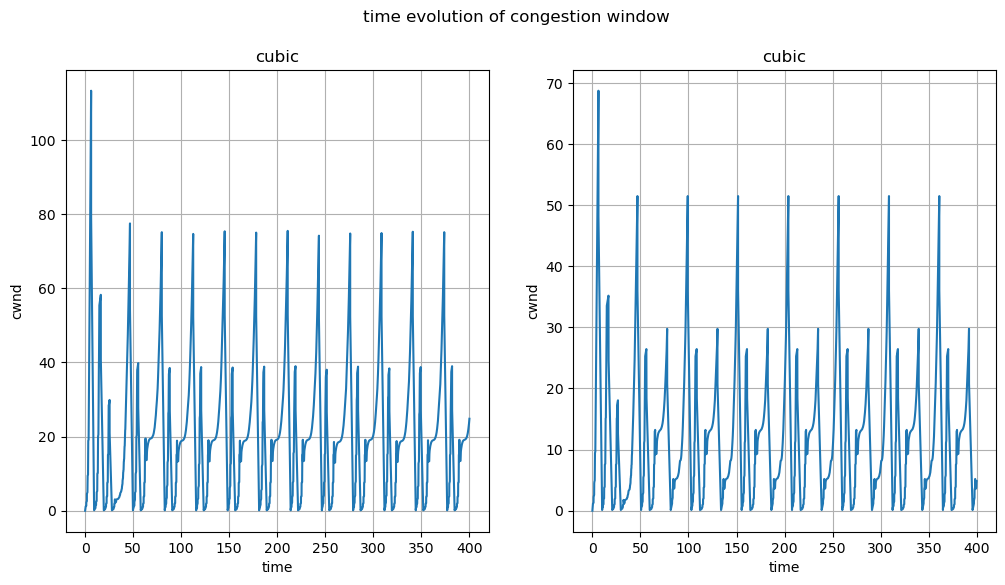

In [21]:
#configure before plotting
filename1 = "03.08.23/cubic2/TcpCubic0.000001-300.000000ms-1Mbps-0-cwnd.data"
filename2 = "03.08.23/cubic2/TcpCubic0.000001-300.000000ms-500Kbps-0-cwnd.data"

mtu = 400*8 # in bits
mss = (400-40) *8 # in bits
bandwidth = 1000000 # in bites per second
# read file and convert to numpy
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")
print("theoretical maximum cwnd for 500Kbps = 156packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 5e5*0.6/mtu, "packets")
data = np.loadtxt(f'./ns3_results/{filename1}')
# plot data
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].plot(data[:,0],data[:,1]/mss)
axs[0].set_xlabel("time")
axs[0].set_ylabel("cwnd")
axs[0].grid()
axs[0].set_title("cubic")
data = np.loadtxt(f'./ns3_results/{filename2}')
axs[1].plot(data[:,0],data[:,1]/mss)
axs[1].set_xlabel("time")
axs[1].set_ylabel("cwnd")
axs[1].grid()
axs[1].set_title("cubic")
fig.suptitle("time evolution of congestion window")
plt.plot()

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets
theoretical maximum cwnd for 500Kbps = 156packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  93.75 packets


[]

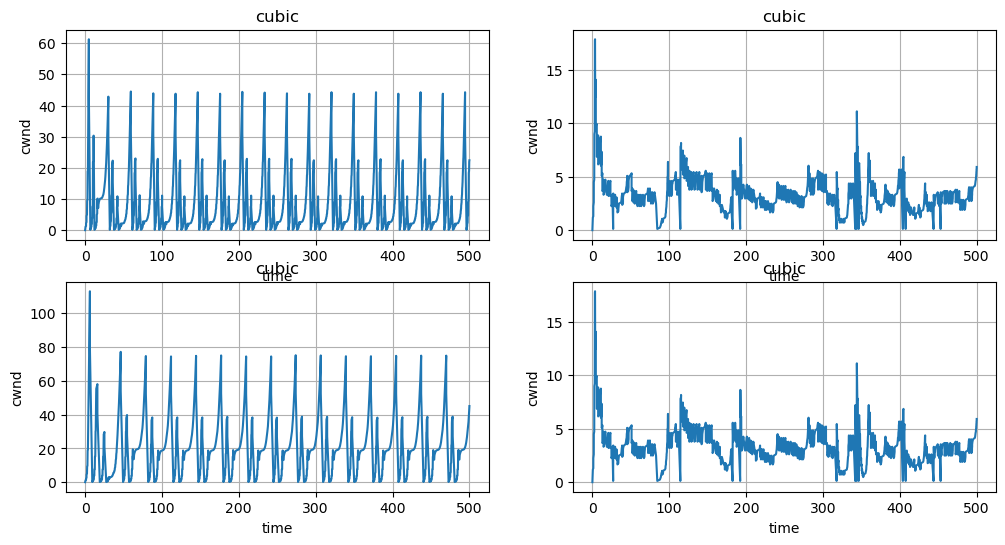

In [23]:
#configure before plotting
cca = "TcpCubic"

filename1 = f"04.08.23/cubic2/TcpCubic0.000001-300.000000ms-1Mbps-0-cwnd.data"
filename2 = f"04.08.23/cubic2/{cca}0.010000-300.000000ms-1Mbps-0-cwnd.data"
filename3 = f"04.08.23/cubic3/{cca}0.000001-300.000000ms-1Mbps-0-cwnd.data"
filename4 = f"04.08.23/cubic3/{cca}0.010000-300.000000ms-1Mbps-0-cwnd.data"
mtu = 400*8 # in bits
mss = (400-40) *8 # in bits
bandwidth = 1000000 # in bites per second
# read file and convert to numpy
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")
print("theoretical maximum cwnd for 500Kbps = 156packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 5e5*0.6/mtu, "packets")
data = np.loadtxt(f'./ns3_results/{filename1}')
# plot data
fig, axs = plt.subplots(2, 2, figsize=(12,6))
axs[0,0].plot(data[:,0],data[:,1]/mss)
axs[0,0].set_xlabel("time")
axs[0,0].set_ylabel("cwnd")
axs[0,0].grid()
axs[0,0].set_title("cubic")
data = np.loadtxt(f'./ns3_results/{filename2}')
axs[0,1].plot(data[:,0],data[:,1]/mss)
axs[0,1].set_xlabel("time")
axs[0,1].set_ylabel("cwnd")
axs[0,1].grid()
axs[0,1].set_title("cubic")
data = np.loadtxt(f'./ns3_results/{filename3}')
axs[1,0].plot(data[:,0],data[:,1]/mss)
axs[1,0].set_xlabel("time")
axs[1,0].set_ylabel("cwnd")
axs[1,0].grid()
axs[1,0].set_title("cubic")
data = np.loadtxt(f'./ns3_results/{filename4}')
axs[1,1].plot(data[:,0],data[:,1]/mss)
axs[1,1].set_xlabel("time")
axs[1,1].set_ylabel("cwnd")
axs[1,1].grid()
axs[1,1].set_title("cubic")
plt.plot()

[]

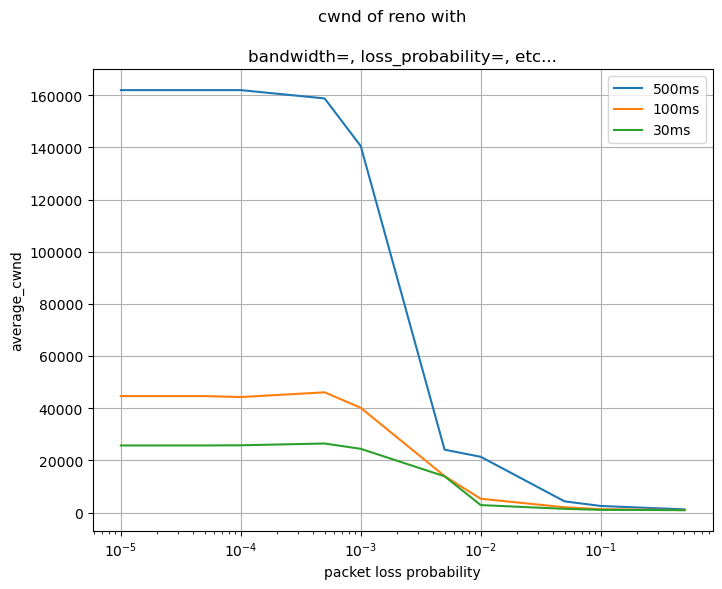

In [19]:
error_ps = ["0.500000","0.100000","0.050000","0.010000","0.005000","0.001000","0.000500","0.000100","0.000050","0.000010"]
error_ps_int = [0.500000,0.100000,0.050000,0.010000,0.005000,0.001000,0.000500,0.000100,0.000050,0.000010]
averages = np.zeros((len(error_ps),3))
# plot data
fig, axs = plt.subplots(1, 1, figsize=(8,6))
for i,e in enumerate(error_ps):
    e = e.replace('.','_')
    for j,rtt in enumerate([500,100,30]):
        filename = "TcpCubic"+e+"-"+str(rtt)+"ms-loss-cwnd.data"
        data = np.loadtxt(f'./ns3_results/{filename}')
        averages[i,j] = np.average(data[:,1])
axs.semilogx(error_ps_int,averages[:,0],label="500ms")
axs.semilogx(error_ps_int,averages[:,1],label="100ms")
axs.semilogx(error_ps_int,averages[:,2],label="30ms")
axs.set_xlabel("packet loss probability")
axs.set_ylabel("average_cwnd")
axs.grid()
axs.set_title("bandwidth=, loss_probability=, etc...")
axs.legend()
fig.suptitle("cwnd of reno with")
if save_figure:
    plt.savefig(f"./figures/ns3_results/{filename}.png")
plt.plot()

In [6]:
folder_path = "./ns3_results/cubic/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500_cubic = {}
average_100_cubic = {}
average_30_cubic = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0_(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+)_",filename).group(1)
    data = np.loadtxt(f'./ns3_results/cubic/{filename}')
    if rtt == "500":
        average_500_cubic[error] = np.average(data[:,1])/1/1024
    if rtt == "100":
        average_100_cubic[error] = np.average(data[:,1])/0.2/1024
    if rtt == "30":
        average_30_cubic[error] = np.average(data[:,1])/0.06/1024
average_500_cubic=dict(sorted(average_500_cubic.items()))
average_100_cubic=dict(sorted(average_100_cubic.items()))
average_30_cubic=dict(sorted(average_30_cubic.items()))

In [7]:
folder_path = "./ns3_results/Hybla/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500 = {}
average_100 = {}
average_30 = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0_(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+?)_",filename).group(1)
    data = np.loadtxt(f'./ns3_results/Hybla/{filename}')
    if rtt == "500":
        average_500[error] = np.average(data[:,1])/1/1024
    if rtt == "100":
        average_100[error] = np.average(data[:,1])/0.2/1024
    if rtt == "30":
        average_30[error] = np.average(data[:,1])/0.06/1024
average_500=dict(sorted(average_500.items()))
average_100=dict(sorted(average_100.items()))
average_30=dict(sorted(average_30.items()))

[]

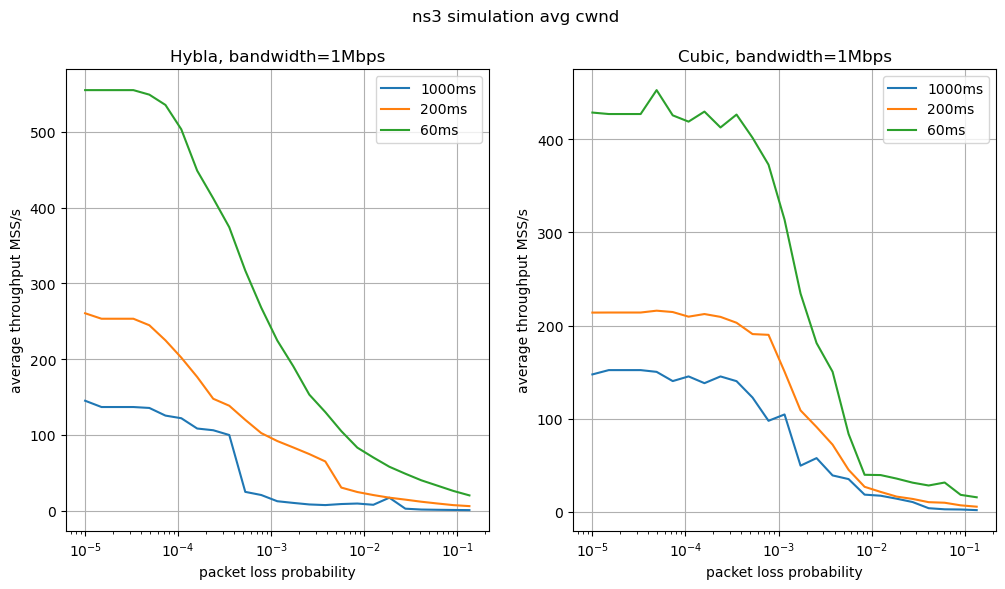

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[1].semilogx(average_500_cubic.keys(),average_500_cubic.values(),label="1000ms")
axs[1].semilogx(average_100_cubic.keys(),average_100_cubic.values(),label="200ms")
axs[1].semilogx(average_30_cubic.keys(),average_30_cubic.values(),label="60ms")
axs[1].set_xlabel("packet loss probability")
axs[1].set_ylabel("average throughput MSS/s")
axs[1].grid()
axs[1].set_title("Cubic, bandwidth=1Mbps")
axs[1].legend()
axs[0].semilogx(average_500.keys(),average_500.values(),label="1000ms")
axs[0].semilogx(average_100.keys(),average_100.values(),label="200ms")
axs[0].semilogx(average_30.keys(),average_30.values(),label="60ms")
axs[0].set_xlabel("packet loss probability")
axs[0].set_ylabel("average throughput MSS/s")
axs[0].grid()
axs[0].set_title("Hybla, bandwidth=1Mbps")
axs[0].legend()
fig.suptitle("ns3 simulation avg cwnd")
save_figure=True
if save_figure:
    plt.savefig(f"./figures/ns3_results/HyblaCubicthroughput.png")
plt.plot()

In [36]:
folder_path = "./ns3_results/19.07.23/cubic/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500_cubic = {}
average_100_cubic = {}
average_30_cubic = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0\.(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+?)\.",filename).group(1)
    data = np.loadtxt(folder_path+filename)
    if rtt == "250":
        average_500_cubic[error] = np.average(data[:,1])/1/1024
    if rtt == "50":
        average_100_cubic[error] = np.average(data[:,1])/0.2/1024
    if rtt == "15":
        average_30_cubic[error] = np.average(data[:,1])/0.06/1024
average_500_cubic=dict(sorted(average_500_cubic.items()))
average_100_cubic=dict(sorted(average_100_cubic.items()))
average_30_cubic=dict(sorted(average_30_cubic.items()))

In [40]:
folder_path = "./ns3_results/19.07.23/hybla/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500 = {}
average_100 = {}
average_30 = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0\.(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+?)\.",filename).group(1)
    data = np.loadtxt(f'./ns3_results/19.07.23/hybla/{filename}')
    if rtt == "250":
        average_500[error] = np.average(data[:,1])/0.5
    if rtt == "50":
        average_100[error] = np.average(data[:,1])/0.1
    if rtt == "15":
        average_30[error] = np.average(data[:,1])/0.03
average_500=dict(sorted(average_500.items()))
average_100=dict(sorted(average_100.items()))
average_30=dict(sorted(average_30.items()))

[]

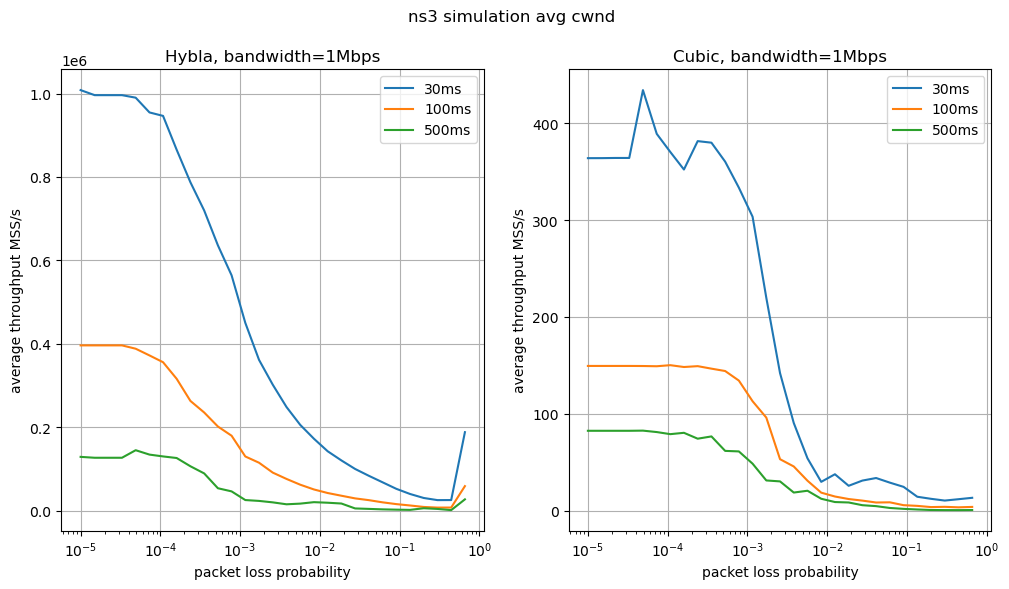

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[1].semilogx(average_30_cubic.keys(),average_30_cubic.values(),label="30ms",color="tab:blue")
axs[1].semilogx(average_100_cubic.keys(),average_100_cubic.values(),label="100ms",color="tab:orange")
axs[1].semilogx(average_500_cubic.keys(),average_500_cubic.values(),label="500ms",color="tab:green")
axs[1].set_xlabel("packet loss probability")
axs[1].set_ylabel("average throughput MSS/s")
axs[1].grid()
axs[1].set_title("Cubic, bandwidth=1Mbps")
axs[1].legend()
axs[0].semilogx(average_30.keys(),average_30.values(),label="30ms", color="tab:blue")
axs[0].semilogx(average_100.keys(),average_100.values(),label="100ms", color="tab:orange")
axs[0].semilogx(average_500.keys(),average_500.values(),label="500ms",color="tab:green")
axs[0].set_xlabel("packet loss probability")
axs[0].set_ylabel("average cwnd")
axs[0].grid()
axs[0].set_title("Hybla, bandwidth=1Mbps, rtt0=25ms")
axs[0].legend()
fig.suptitle("ns3 simulation avg cwnd")
save_figure=False
if save_figure:
    plt.savefig(f"./figures/ns3_results/HyblaCubicCwnd.png")
plt.plot()

In [83]:
# I want to plot the ns-3 results with confidence intervals
def average_cwnd(file_path):
    data = np.loadtxt(file_path)
    return np.average(data[:,1])


def get_error(file_path):
    match = re.search(r"[ac](0\.\d+?)-", file_path)
    if not match: 
        print(f"Error: Error not found in {file_path}")
        return None
    return float(match.group(1))

def get_rtt(file_path):
    match = re.search(r"-(\d+?\.\d+?)ms",file_path)
    if not match: 
        print(f"Error: Delay not found in {file_path}")
        return None
    return 2*float(match.group(1))
def get_run(file_path):
    match = re.search(r"-(\d+?)-",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None
    return int(match.group(1))
def get_bandwidth(file_path):
    match = re.search(r"-(\d+?[GMK]bps)-",file_path)
    if not match: 
        print(f"Error: Bandwidth not found in {file_path}")
        return None
    return match.group(1)

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets


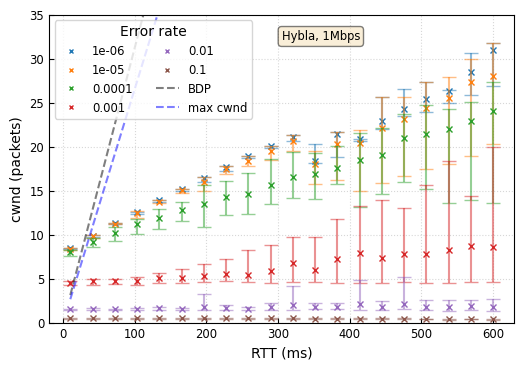

In [79]:
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 400*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "Hybla"
folder_path = "./ns3_results/03.08.23/hybla2/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.plot(points[:,0],1.7/2*bdw*points[:,0]/1000/mtu,linestyle='--',color='blue', alpha = 0.5,label="max cwnd")
ax.set_ylim(0, 35)
ax.text(0.50, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets


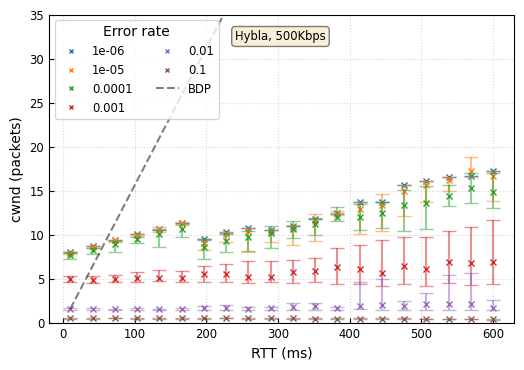

In [73]:
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 400*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "500Kbps"
bdw = 500000

folder_path = "./ns3_results/03.08.23/hybla2/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.set_ylim(0, 35)
ax.text(0.40, 0.95, f"Hybla, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets


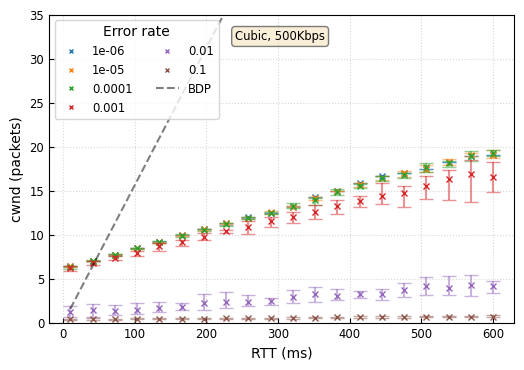

In [75]:
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 400*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "500Kbps"
bdw = 500000
cca = "Cubic"
folder_path = "./ns3_results/03.08.23/cubic2/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.set_ylim(0, 35)
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets


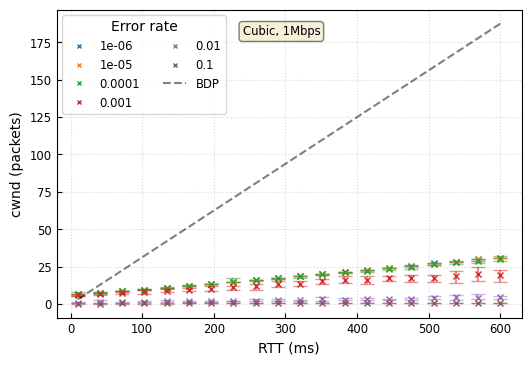

In [80]:
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 400*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "1Mbps"
bdw = 1e6
cca = "Cubic"
folder_path = "./ns3_results/03.08.23/cubic2/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
#ax.set_ylim(0, 35)
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()    
# add the figure legend in latex as Average cwnd for different RTTs and errors, Hybla, Bottleneck bandwidth = 1Mbps

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  187.5 packets


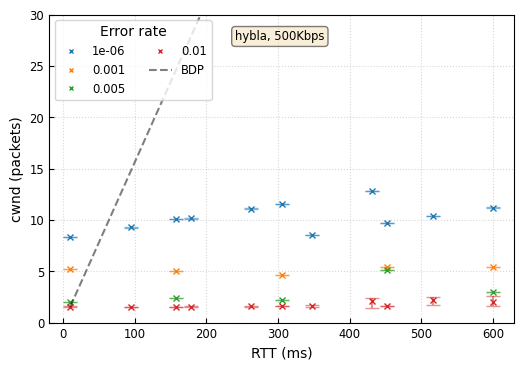

In [85]:
# This is a new test where I deleted all the queues on the network
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 400*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "500Kbps"
bdw = 5e5
cca = "hybla"
folder_path = "./ns3_results/04.08.23/hybla/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", 1e6*0.6/mtu, "packets")

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
ax.set_ylim(0, 30)
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()

theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is  73.2421875 packets


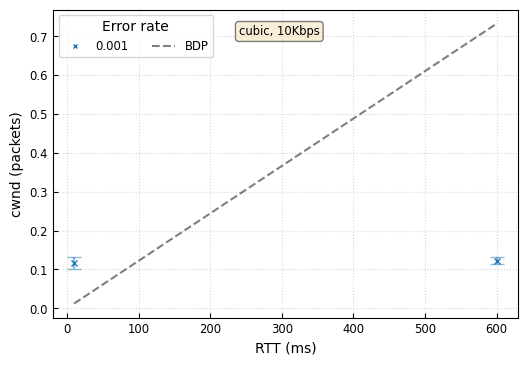

In [94]:
def get_run(file_path):
    match = re.search(r"-(\d+?).",file_path)
    if not match: 
        print(f"Error: Run not found in {file_path}")
        return None

# This is a new test where I deleted all the queues on the network
import matplotlib.colors as mcolors
my_colours = list(mcolors.TABLEAU_COLORS.values())
mtu = 1024*8 # bits
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
bw = "10Kbps"
bdw = 1e4
cca = "cubic"
folder_path = "./ns3_results/07.08.23/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
# Create dictionary to store the average cwnd for each error, rtt, and run
results = {}
for i,filename in enumerate(file_list):
    if not filename.endswith(".cwnd"):
        continue
    bandwidth = get_bandwidth(f'{folder_path}{filename}')
    error = get_error(f'{folder_path}{filename}')
    rtt = get_rtt(f'{folder_path}{filename}')
    run = get_run(f'{folder_path}{filename}')
    if bandwidth not in results:
        results[bandwidth] = {}
    if error not in results[bandwidth]:
        results[bandwidth][error] = {}
    if rtt not in results[bandwidth][error]:
        results[bandwidth][error][rtt] = []
    results[bandwidth][error][rtt].append(average_cwnd(f'{folder_path}{filename}'))


fig, ax = plt.subplots(1,1,figsize=(6,4))
print("theoretical maximum cwnd for 1Mbps = 312packets/s (MSS= 3200b) bottleneck link with RTT = 300ms is ", bdw/mtu, "packets")

# sort the dictionary by error key
results[bw] = dict(sorted(results[bw].items()))
for j,error in enumerate(results[bw]):
    points = np.zeros((len(results[bw][error]),4))
    for i, rtt in enumerate(results[bw][error]):
        points[i,:] = rtt , np.average(results[bw][error][rtt])/mtu, np.min(results[bw][error][rtt])/mtu, np.max(results[bw][error][rtt])/mtu
    points = points[points[:,0].argsort()]
    ax.errorbar(points[:,0],points[:,1], yerr=[abs(points[:,1]-points[:,2]), abs(points[:,3]-points[:,1])], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    #ax.errorbar(points[:,0],points[:,1], yerr=[points[:,1]*0.1, points[:,1]*0.08], fmt='none', capsize=5,alpha=0.5, color=my_colours[j%len(my_colours)])
    ax.plot(points[:,0],points[:,1],label=error,marker='x', markerfacecolor="none", markersize = '4',linestyle='',color=my_colours[j%len(my_colours)])
ax.plot(points[:,0],bdw*points[:,0]/1000/mtu,linestyle='--',color='black', alpha = 0.5,label="BDP")
# ax.set_ylim(0, 30)
ax.text(0.40, 0.95, f"{cca}, {bw}", transform=ax.transAxes, fontsize="small",
        verticalalignment='top', bbox=props)
ax.legend(title="Error rate",loc='upper left',fontsize="small", markerscale=0.6, ncols=2)
plt.tick_params(axis='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
ax.grid()
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("cwnd (packets)")
plt.show()